<a href="https://colab.research.google.com/github/hankaj/Machine-Learning-Techniques/blob/master/ML2021_Second_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
url='https://raw.githubusercontent.com/hankaj/Machine-Learning-Techniques/master/comments.csv'

In [17]:
import pandas as pd
df1 = pd.read_csv(url)
df1

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...
...,...,...
595,Auto,Recently our 12 year old Nissan Stanza decide...
596,Camera,I always do a lot of research before I buy an...
597,Auto,This car is an all around good buy If you ar...
598,Auto,I waited to write this until I have had 4 mon...


In [18]:
y = df1.iloc[:,0]
y

0        Auto
1      Camera
2        Auto
3      Camera
4      Camera
        ...  
595      Auto
596    Camera
597      Auto
598      Auto
599      Auto
Name: class, Length: 600, dtype: object

In [19]:
X = df1.iloc[:, 1]
X

0       I have recently purchased a J30T with moderat...
1       I bought this product because I need instant ...
2       I have owned my Buick since 53000 km and I am...
3       This was my first Digital camera so I did qui...
4       Minolta DiMAGE 7Hi is in a digital SLR with 5...
                             ...                        
595     Recently our 12 year old Nissan Stanza decide...
596     I always do a lot of research before I buy an...
597     This car is an all around good buy  If you ar...
598     I waited to write this until I have had 4 mon...
599     I have been a Montero owner since about 1985 ...
Name: text, Length: 600, dtype: object

In [43]:
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize, sent_tokenize

new_features = pd.DataFrame(np.zeros((X.shape[0], 2)), columns=['pos', 'number of words'])

for com_idx, comment in enumerate(X):
  # remove useless data: !"_$%&/()=_ˆ*¡@
  comment = re.sub('[!@#$%^&*()_+<>]', '', comment)

  # convert to lowercase
  comment = comment.lower()

  # substitute multiple spaces with single space
  comment = re.sub(r'\s+', ' ', comment, flags=re.I)

  # lemmatize and get features
  tokens = word_tokenize(comment)
  n_words = len(tokens)
  comment = [lemmatizer.lemmatize(t, pos = 'v') for t in tokens]
  tags = nltk.pos_tag(tokens)
  comment = ' '.join(comment)
  tags = ' '.join([word[1] for word in tags])

  X[com_idx] = comment
  new_features.iloc[com_idx, 0] = tags
  new_features.iloc[com_idx, 1] = n_words

X=pd.concat([X, new_features], axis=1)
X

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,pos,number of words
0,i have recently purchase a j30t with moderate ...,NNS VBP RB VB DT NN IN JJ NNS VBP NN IN DT NN ...,221.0
1,i buy this product because i need instant grat...,JJ VBP DT NN IN JJ VBP JJ NN NN MD VB VB DT NN...,536.0
2,i have own my buick since 53000 km and i be no...,NNS VBP JJ PRP$ NN IN CD NN CC JJ VB RB VBZ CD...,278.0
3,this be my first digital camera so i do quite ...,DT VB PRP$ JJ JJ NN RB JJ VBP RB DT NN IN NN R...,202.0
4,minolta dimage 7hi be in a digital slr with 5 ...,JJ NN CD VB IN DT JJ NN IN CD NNS CD CD NN NN ...,974.0
...,...,...,...
595,recently our 12 year old nissan stanza decide ...,RB PRP$ CD NN JJ JJ NN VB PRP VB NN TO VB RB P...,408.0
596,i always do a lot of research before i buy any...,NN RB VBP DT NN IN NN IN JJ VBP NN RB PRP VBP ...,341.0
597,this car be an all around good buy if you be i...,DT NN VB DT DT RB JJ NN IN PRP VB IN NNS PRP M...,158.0
598,i wait to write this until i have have 4 month...,JJ VBP TO VB DT IN NNS VBP VBP CD NNS IN NN PR...,461.0


In [44]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
X_train

,text,pos,number of words
588,the mavica become so frustrate i didn t want t...,DT NN VBP RB JJ NN VBP NN VBP TO VB PRP RB VBD...,466.0
165,i recently receive the kodak dc215 as an early...,NN RB VBD DT NN NN IN DT JJ NN NN IN JJ MD VB ...,1196.0
465,this be my first review so if i ve miss anythi...,DT VB PRP$ JJ NN IN IN JJ VBP VB NN RP NN VB J...,503.0
50,with my best friend live on the other side of ...,IN PRP$ JJS NN NN IN DT JJ NN IN DT NN VBZ VBP...,495.0
414,i m guess you ve read a few other review alrea...,NN VBP NN PRP VBP VB DT JJ JJ NN RB CC VB DT N...,661.0
...,...,...,...
280,when we go to buy our new pickup we of course ...,WRB PRP VBP TO VB PRP$ JJ NN PRP IN NN VBP TO ...,257.0
567,i buy this camera a year ago to take picture o...,JJ VBP DT NN DT NN RB TO VB NN IN NNS VBP VBP ...,139.0
325,i receive my d 600l last christmas as a gift a...,RB VBP PRP$ NN CD JJ NN IN DT NN CC IN DT NN N...,213.0
77,i buy the 1995 ls integra sedan new after 84 0...,NN VBP DT CD NN JJ NN JJ IN CD CD NN NNS DT NN...,438.0


In [47]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#TFIDF
vectorizer = TfidfVectorizer()
vectorizer.fit(X.iloc[:, 0])

X_train_Tfidf = vectorizer.transform(X_train.iloc[:, 0])
X_test_Tfidf = vectorizer.transform(X_test.iloc[:, 0])

In [48]:
#TFIDF + N-grams
vectorizer_NGrams = TfidfVectorizer(ngram_range=(1, 2))
vectorizer_NGrams.fit(X.iloc[:, 0])

X_train_Tfidf_NGrams = vectorizer.transform(X_train.iloc[:, 0])
X_test_Tfidf_NGrams = vectorizer.transform(X_test.iloc[:, 0])

In [52]:
#TFIDF + N-grams + POS tagging
vectorizer_POS = TfidfVectorizer(ngram_range=(1, 2))
vectorizer_POS.fit(X.iloc[:, 1])

X_train_POS = vectorizer.transform(X_train.iloc[:, 1])
X_test_POS = vectorizer.transform(X_test.iloc[:, 1])
X_train_Tfidf_NGrams_POS = [X_train_Tfidf_NGram, X_train_POS]
X_test_Tfidf_NGrams_POS = [X_test_Tfidf_NGrams, X_test_POS]

In [55]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train_Tfidf, y_train)

y_pred = SVM.predict(X_test_Tfidf)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 73   0]
 [  0 107]]
              precision    recall  f1-score   support

        Auto       1.00      1.00      1.00        73
      Camera       1.00      1.00      1.00       107

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


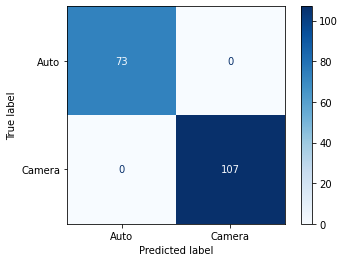

[[ 73   0]
 [  0 107]]


In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(SVM, vectorizer.transform(X_test), y_test, display_labels=["Auto", "Camera"],cmap=plt.cm.Blues) 
plt.show()
print(disp.confusion_matrix)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_Tfidf, y_train)
y_pred = classifier.predict(X_test_Tfidf)

[[ 73   0]
 [  0 107]]
              precision    recall  f1-score   support

        Auto       1.00      1.00      1.00        73
      Camera       1.00      1.00      1.00       107

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


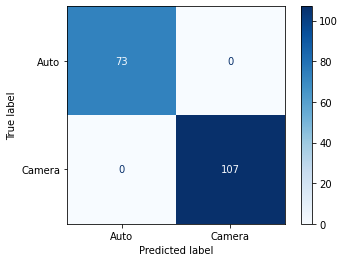

[[ 73   0]
 [  0 107]]


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
disp = plot_confusion_matrix(SVM, vectorizer.transform(X_test), y_test, display_labels=["Auto", "Camera"],cmap=plt.cm.Blues) 
plt.show()
print(disp.confusion_matrix)